# Fundamentos de Aprendizaje Automático
## _Práctica 2: K-NN y K-MEANS_
### _Grupo 1461_
#### _Rubén Torralba Manso y Alejandro Monterrubio Navarro_

Importes:

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from abc import ABCMeta,abstractmethod
import numpy as np
from Datos import Datos
from Clasificador import *
import EstrategiaParticionado as EstrategiaParticionado
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from EstrategiaParticionado import ValidacionSimple as validacionSimple

Carga de datasets:

In [355]:
dataset1 = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = Datos('ConjuntosDatosP2/wdbc.csv')
dataset3 = Datos('ConjuntosDatosP2/iris.csv')

# Apartado 1: Algoritmo K-NN

Hacemos que el clasificador sea K-NN y cargo su dataset:

In [356]:
errores = []
validacionSimple = EstrategiaParticionado.ValidacionSimple(10,5) #
clasificador = ClasificadorKNN()

Vamos a realizar pruebas para K = 1, K = 3 y K = 5, siempre impares para que no pueda haber empates

## Para pima-indians-diabetes:

Creamos las particiones necesarias mediante la estrategia de particionado de validación simple:

In [357]:
validacionSimple.creaParticiones(dataset1.datos)

### Para K = 1:

#### Sin normalizar los datos:

Le doy valor a la K:

In [358]:
K = 1

Mostramos el error mediante un bucle:

In [359]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [360]:
err_diabetes_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

29.21%


#### Normalizando los datos:

In [361]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset1.datos)
clasificador.calcularMediaDesviacion(dataset1.datos,dataset1.nominalAtributos)
clasificador.normalizarDatos(dataset1.datos,dataset1.nominalAtributos)

    Pregs Plas Pres Skin Test  Mass   Pedi Age Class
0       6  148   72   35    0  33.6  0.627  50     1
1       1   85   66   29    0  26.6  0.351  31     0
2       8  183   64    0    0  23.3  0.672  32     1
3       1   89   66   23   94  28.1  0.167  21     0
4       0  137   40   35  168  43.1  2.288  33     1
..    ...  ...  ...  ...  ...   ...    ...  ..   ...
763    10  101   76   48  180  32.9  0.171  63     0
764     2  122   70   27    0  36.8  0.340  27     0
765     5  121   72   23  112  26.2  0.245  30     0
766     1  126   60    0    0  30.1  0.349  47     1
767     1   93   70   31    0  30.4  0.315  23     0

[768 rows x 9 columns]
        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.599110  1.901133  0.562975 -0.088497 -0.704754 -0.113147 -0.693714   
1   -0.687147  0.791870  0.457331 -0.194141 -0.704754 -0.236399 -0.698574   
2   -0.563895  2.517390  0.422116 -0.704754 -0.704754 -0.294503 -0.692922   
3   -0.687147  0.862300  0.45733

Mostramos el error mediante un bucle:

In [362]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [363]:
err_diabetes_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

30.53%


### Para K = 3:

#### Sin normalizar los datos:

Le doy valor a la K:

In [364]:
K = 3

Mostramos el error mediante un bucle:

In [365]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [366]:
err_diabetes_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

30.53%


#### Normalizando los datos:

In [367]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset1.datos)
clasificador.calcularMediaDesviacion(dataset1.datos,dataset1.nominalAtributos)
clasificador.normalizarDatos(dataset1.datos,dataset1.nominalAtributos)

        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.599110  1.901133  0.562975 -0.088497 -0.704754 -0.113147 -0.693714   
1   -0.687147  0.791870  0.457331 -0.194141 -0.704754 -0.236399 -0.698574   
2   -0.563895  2.517390  0.422116 -0.704754 -0.704754 -0.294503 -0.692922   
3   -0.687147  0.862300  0.457331 -0.299785  0.950336 -0.209988 -0.701814   
4   -0.704754  1.707452 -0.000460 -0.088497  2.253280  0.054122 -0.664468   
..        ...       ...       ...       ...       ...       ...       ...   
763 -0.528681  1.073588  0.633404  0.140398  2.464568 -0.125472 -0.701743   
764 -0.669539  1.443342  0.527760 -0.229356 -0.704754 -0.056804 -0.698768   
765 -0.616717  1.425735  0.562975 -0.299785  1.267268 -0.243442 -0.700440   
766 -0.687147  1.513771  0.351687 -0.704754 -0.704754 -0.174773 -0.698609   
767 -0.687147  0.932729  0.527760 -0.158926 -0.704754 -0.169491 -0.699208   

          Age Class  
0    0.175613     1  
1   -0.158926     0  
2   -0.14

Mostramos el error mediante un bucle:

In [368]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [369]:
err_diabetes_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

30.20%


### Para K = 5:

#### Sin normalizar los datos:

Le doy valor a la K:

In [370]:
K = 5

Mostramos el error mediante un bucle:

In [371]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [372]:
err_diabetes_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

30.21%


#### Normalizando los datos:

In [373]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset1.datos)
clasificador.calcularMediaDesviacion(dataset1.datos,dataset1.nominalAtributos)
clasificador.normalizarDatos(dataset1.datos,dataset1.nominalAtributos)

        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.726117  1.811202  0.453201 -0.207932 -0.833327 -0.232948 -0.822124   
1   -0.815459  0.685490  0.345990 -0.315143 -0.833327 -0.358027 -0.827056   
2   -0.690380  2.436598  0.310253 -0.833327 -0.833327 -0.416993 -0.821320   
3   -0.815459  0.756964  0.345990 -0.422353  0.846306 -0.331224 -0.830343   
4   -0.833327  1.614649 -0.118590 -0.207932  2.168571 -0.063197 -0.792444   
..        ...       ...       ...       ...       ...       ...       ...   
763 -0.654643  0.971385  0.524674  0.024358  2.382992 -0.245456 -0.830272   
764 -0.797591  1.346623  0.417464 -0.350879 -0.833327 -0.175769 -0.827252   
765 -0.743985  1.328754  0.453201 -0.422353  1.167938 -0.365174 -0.828950   
766 -0.815459  1.418097  0.238779 -0.833327 -0.833327 -0.295487 -0.827091   
767 -0.815459  0.828438  0.417464 -0.279406 -0.833327 -0.290127 -0.827699   

          Age Class  
0    0.060095     1  
1   -0.279406     0  
2   -0.26

Mostramos el error mediante un bucle:

In [374]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset1.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset1.nominalAtributos,K)
    
    error = clasificador.error(dataset1.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [375]:
err_diabetes_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

28.99%


## Para wdbc:

Creamos las particiones necesarias mediante la estrategia de particionado de validación simple:

In [376]:
validacionSimple.creaParticiones(dataset2.datos)

### Para K = 1:

#### Sin normalizar los datos:

Le doy valor a la K:

In [377]:
K = 1

Mostramos el error mediante un bucle:

In [378]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [379]:
err_wdbc_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

26.23%


#### Normalizando los datos:

In [380]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset2.datos)
clasificador.calcularMediaDesviacion(dataset2.datos,dataset2.nominalAtributos)
clasificador.normalizarDatos(dataset2.datos,dataset2.nominalAtributos)

    Atributo1 Atributo2 Atributo3 Atributo4 Atributo5 Atributo6 Atributo7  \
0       17.99     10.38     122.8      1001    0.1184    0.2776    0.3001   
1       20.57     17.77     132.9      1326   0.08474   0.07864    0.0869   
2       19.69     21.25       130      1203    0.1096    0.1599    0.1974   
3       11.42     20.38     77.58     386.1    0.1425    0.2839    0.2414   
4       20.29     14.34     135.1      1297    0.1003    0.1328     0.198   
..        ...       ...       ...       ...       ...       ...       ...   
564     21.56     22.39       142      1479     0.111    0.1159    0.2439   
565     20.13     28.25     131.2      1261    0.0978    0.1034     0.144   
566      16.6     28.08     108.3     858.1   0.08455    0.1023   0.09251   
567      20.6     29.33     140.1      1265    0.1178     0.277    0.3514   
568      7.76     24.54     47.92       181   0.05263   0.04362         0   

    Atributo8 Atributo9 Atributo10  ... Atributo22 Atributo23 Atributo24  \

Mostramos el error mediante un bucle:

In [381]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [382]:
err_wdbc_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

23.71%


### Para K = 3:

#### Sin normalizar los datos:

Le doy valor a la K:

In [383]:
K = 3

Mostramos el error mediante un bucle:

In [384]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [385]:
err_wdbc_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

21.51%


#### Normalizando los datos:

In [386]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset2.datos)
clasificador.calcularMediaDesviacion(dataset2.datos,dataset2.nominalAtributos)
clasificador.normalizarDatos(dataset2.datos,dataset2.nominalAtributos)

     Atributo1  Atributo2  Atributo3  Atributo4  Atributo5  Atributo6  \
0    -0.186571  -0.220417   0.279584   4.185483  -0.266057  -0.265349   
1    -0.175096  -0.187549   0.324505   5.630959  -0.266207  -0.266234   
2    -0.179010  -0.172072   0.311607   5.083902  -0.266096  -0.265872   
3    -0.215792  -0.175941   0.078463   1.450642  -0.265950  -0.265321   
4    -0.176341  -0.202805   0.334290   5.501978  -0.266138  -0.265993   
..         ...        ...        ...        ...        ...        ...   
564  -0.170693  -0.167001   0.364978   6.311444  -0.266090  -0.266068   
565  -0.177053  -0.140938   0.316944   5.341864  -0.266149  -0.266124   
566  -0.192753  -0.141695   0.215093   3.549918  -0.266208  -0.266129   
567  -0.174963  -0.136135   0.356528   5.359654  -0.266060  -0.265352   
568  -0.232070  -0.157439  -0.053454   0.538435  -0.266350  -0.266390   

     Atributo7  Atributo8  Atributo9  Atributo10  ...  Atributo22  Atributo23  \
0    -0.265249  -0.265929  -0.265508   -0.

Mostramos el error mediante un bucle:

In [387]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [388]:
err_wdbc_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

19.97%


### Para K = 5:

#### Sin normalizar los datos:

Le doy valor a la K:

In [389]:
K = 5

Mostramos el error mediante un bucle:

In [390]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [391]:
err_wdbc_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

18.70%


#### Normalizando los datos:

In [392]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset2.datos)
clasificador.calcularMediaDesviacion(dataset2.datos,dataset2.nominalAtributos)
clasificador.normalizarDatos(dataset2.datos,dataset2.nominalAtributos)

     Atributo1  Atributo2  Atributo3  Atributo4  Atributo5  Atributo6  \
0    -0.232014  -0.264837   0.220042   4.007804  -0.309096  -0.308409   
1    -0.220886  -0.232963   0.263604   5.409561  -0.309241  -0.309268   
2    -0.224682  -0.217953   0.251096   4.879050  -0.309134  -0.308917   
3    -0.260351  -0.221706   0.025003   1.355680  -0.308992  -0.308382   
4    -0.222094  -0.247757   0.273093   5.284481  -0.309174  -0.309034   
..         ...        ...        ...        ...        ...        ...   
564  -0.216616  -0.213037   0.302853   6.069465  -0.309128  -0.309107   
565  -0.222784  -0.187762   0.256272   5.129210  -0.309185  -0.309161   
566  -0.238009  -0.188495   0.157502   3.391462  -0.309242  -0.309166   
567  -0.220757  -0.183104   0.294658   5.146462  -0.309099  -0.308412   
568  -0.276137  -0.203763  -0.102923   0.471064  -0.309380  -0.309419   

     Atributo7  Atributo8  Atributo9  Atributo10  ...  Atributo22  Atributo23  \
0    -0.308312  -0.308972  -0.308563   -0.

Mostramos el error mediante un bucle:

In [393]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [394]:
err_wdbc_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

17.50%


## Para iris:

Creamos las particiones necesarias mediante la estrategia de particionado de validación simple:

In [395]:
validacionSimple.creaParticiones(dataset3.datos)

### Para K = 1:

#### Sin normalizar los datos:

Le doy valor a la K:

In [396]:
K = 1

Mostramos el error mediante un bucle:

In [397]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset3.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset3.nominalAtributos,K)
    
    error = clasificador.error(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [398]:
err_iris_k1 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

16.46%


#### Normalizando los datos:

In [399]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset3.datos)
clasificador.calcularMediaDesviacion(dataset3.datos,dataset3.nominalAtributos)
clasificador.normalizarDatos(dataset3.datos,dataset3.nominalAtributos)

      SL   SW   PL   PW  Class
0    5.1  3.5  1.4  0.2      1
1    4.9  3.0  1.4  0.2      1
2    4.7  3.2  1.3  0.2      1
3    4.6  3.1  1.5  0.2      1
4    5.0  3.6  1.4  0.2      1
..   ...  ...  ...  ...    ...
145  6.7  3.0  5.2  2.3      3
146  6.3  2.5  5.0  1.9      3
147  6.5  3.0  5.2  2.0      3
148  6.2  3.4  5.4  2.3      3
149  5.9  3.0  5.1  1.8      3

[150 rows x 5 columns]
           SL        SW        PL        PW  Class
0    1.017634  0.173591 -0.934214 -1.567246      1
1    0.912129 -0.090172 -0.934214 -1.567246      1
2    0.806623  0.015333 -0.986967 -1.567246      1
3    0.753871 -0.037419 -0.881462 -1.567246      1
4    0.964881  0.226344 -0.934214 -1.567246      1
..        ...       ...       ...       ...    ...
145  1.861676 -0.090172  1.070386 -0.459440      3
146  1.650666 -0.353935  0.964881 -0.670451      3
147  1.756171 -0.090172  1.070386 -0.617698      3
148  1.597913  0.120839  1.175892 -0.459440      3
149  1.439655 -0.090172  1.017634 -0.723204

Mostramos el error mediante un bucle:

In [400]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [401]:
err_iris_k1_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

16.33%


### Para K = 3:

#### Sin normalizar los datos:

Le doy valor a la K:

In [402]:
K = 3

Mostramos el error mediante un bucle:

In [403]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset3.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset3.nominalAtributos,K)
    
    error = clasificador.error(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [404]:
err_iris_k3 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

15.42%


#### Normalizando los datos:

In [405]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset3.datos)
clasificador.calcularMediaDesviacion(dataset3.datos,dataset3.nominalAtributos)
clasificador.normalizarDatos(dataset3.datos,dataset3.nominalAtributos)

           SL        SW        PL        PW  Class
0    1.017634  0.173591 -0.934214 -1.567246      1
1    0.912129 -0.090172 -0.934214 -1.567246      1
2    0.806623  0.015333 -0.986967 -1.567246      1
3    0.753871 -0.037419 -0.881462 -1.567246      1
4    0.964881  0.226344 -0.934214 -1.567246      1
..        ...       ...       ...       ...    ...
145  1.861676 -0.090172  1.070386 -0.459440      3
146  1.650666 -0.353935  0.964881 -0.670451      3
147  1.756171 -0.090172  1.070386 -0.617698      3
148  1.597913  0.120839  1.175892 -0.459440      3
149  1.439655 -0.090172  1.017634 -0.723204      3

[150 rows x 5 columns]
           SL        SW        PL        PW  Class
0    0.397402 -0.281465 -1.172476 -1.681626      1
1    0.312543 -0.493610 -1.172476 -1.681626      1
2    0.227685 -0.408752 -1.214906 -1.681626      1
3    0.185256 -0.451181 -1.130047 -1.681626      1
4    0.354972 -0.239035 -1.172476 -1.681626      1
..        ...       ...       ...       ...    ...
145  1.

Mostramos el error mediante un bucle:

In [406]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [407]:
err_iris_k3_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

15.29%


### Para K = 5:

#### Sin normalizar los datos:

Le doy valor a la K:

In [408]:
K = 5

Mostramos el error mediante un bucle:

In [409]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset3.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset3.nominalAtributos,K)
    
    error = clasificador.error(dataset3.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [410]:
err_iris_k5 = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

14.47%


#### Normalizando los datos:

In [411]:
clasificador = ClasificadorKNN()
validacionSimple.creaParticiones(dataset3.datos)
clasificador.calcularMediaDesviacion(dataset3.datos,dataset3.nominalAtributos)
clasificador.normalizarDatos(dataset3.datos,dataset3.nominalAtributos)

           SL        SW        PL        PW  Class
0    0.397402 -0.281465 -1.172476 -1.681626      1
1    0.312543 -0.493610 -1.172476 -1.681626      1
2    0.227685 -0.408752 -1.214906 -1.681626      1
3    0.185256 -0.451181 -1.130047 -1.681626      1
4    0.354972 -0.239035 -1.172476 -1.681626      1
..        ...       ...       ...       ...    ...
145  1.076268 -0.493610  0.439831 -0.790614      3
146  0.906551 -0.705756  0.354972 -0.960331      3
147  0.991409 -0.493610  0.439831 -0.917902      3
148  0.864122 -0.323894  0.524689 -0.790614      3
149  0.736835 -0.493610  0.397402 -1.002760      3

[150 rows x 5 columns]
           SL        SW        PL        PW  Class
0    0.189377 -0.357912 -1.076229 -1.486696      1
1    0.120966 -0.528940 -1.076229 -1.486696      1
2    0.052554 -0.460529 -1.110434 -1.486696      1
3    0.018349 -0.494734 -1.042023 -1.486696      1
4    0.155171 -0.323707 -1.076229 -1.486696      1
..        ...       ...       ...       ...    ...
145  0.

Mostramos el error mediante un bucle:

In [412]:
for i in range(5):
    
    predicciones = clasificador.clasifica(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset2.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset2.nominalAtributos,K)
    
    error = clasificador.error(dataset2.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

    errores.append(error) 

El error es:

In [413]:
err_iris_k5_norm = f'{np.mean(errores) * 100:.2f}%'
print(f'{np.mean(errores) * 100:.2f}%')

14.56%


### Comparación de errores:

Errores pima-indians-diabetes:

In [414]:
print('Para K = 1:')
print('Error para pima-indians-diabetes k=1: ' + err_diabetes_k1)
print('Error para pima-indians-diabetes k=1 normalizado: ' + err_diabetes_k1_norm)
print('\nPara K = 3:')
print('Error para pima-indians-diabetes k=3: ' + err_diabetes_k3)
print('Error para pima-indians-diabetes k=3 normalizado: ' + err_diabetes_k3_norm)
print('\nError para K = 5:')
print('Error para pima-indians-diabetes k=5: ' + err_diabetes_k5)
print('Error para pima-indians-diabetes k=5 normalizado: ' + err_diabetes_k5_norm)


Para K = 1:

Error para pima-indians-diabetes k=1: 29.21%
Error para pima-indians-diabetes k=1 normalizado: 30.53%
Para K = 3:

Error para pima-indians-diabetes k=3: 30.53%
Error para pima-indians-diabetes k=3 normalizado: 30.20%
Error para K = 5:

Error para pima-indians-diabetes k=5: 30.21%
Error para pima-indians-diabetes k=5 normalizado: 28.99%


Errores wdbc:

In [415]:
print('Para K = 1:')
print('Error para wdbc k=1: ' + err_wdbc_k1)
print('Error para wdbc k=1 normalizado: ' + err_wdbc_k1_norm)
print('\nPara K = 3:')
print('Error para wdbc k=3: ' + err_wdbc_k3)
print('Error para wdbc k=3 normalizado: ' + err_wdbc_k3_norm)
print('\nError para K = 5:')
print('Error para wdbc k=5: ' + err_wdbc_k5)
print('Error para wdbc k=5 normalizado: ' + err_wdbc_k5_norm)

Para K = 1:

Error para wdbc k=1: 26.23%
Error para wdbc k=1 normalizado: 23.71%
Para K = 3:

Error para wdbc k=3: 21.51%
Error para wdbc k=3 normalizado: 19.97%
Error para K = 5:

Error para wdbc k=5: 18.70%
Error para wdbc k=5 normalizado: 17.50%


Errores iris:

In [416]:
print('Para K = 1:')
print('Error para iris k=1: ' + err_iris_k1)
print('Error para iris k=1 normalizado: ' + err_iris_k1_norm)
print('\nPara K = 3:')
print('Error para iris k=3: ' + err_iris_k3)
print('Error para iris k=3 normalizado: ' + err_iris_k3_norm)
print('\nError para K = 5:')
print('Error para iris k=5: ' + err_iris_k5)
print('Error para iris k=5 normalizado: ' + err_iris_k5_norm)

Para K = 1:

Error para iris k=1: 16.46%
Error para iris k=1 normalizado: 16.33%
Para K = 3:

Error para iris k=3: 15.42%
Error para iris k=3 normalizado: 15.29%
Error para K = 5:

Error para iris k=5: 14.47%
Error para iris k=5 normalizado: 14.56%


# Apartado 2: Algoritmo K-Means

# Apartado 3: Scikit-learn y comparación

In [417]:
dataset1 = pd.read_csv('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = pd.read_csv('ConjuntosDatosP2/wdbc.csv')
dataset3 = pd.read_csv('ConjuntosDatosP2/iris.csv')

Vamos a utilizar la libreria de scikit-learn para poder ver como se ejecutan los algotirmos anteriormente vistos y con los resultados obtenidos poder compararlos con nuestros propios algoritmos.

Para esto vamos a utilizar K-NN para los archivos pima-indians-diabetes-csv y wbcd.csv, y K-Means para iris.csv

### K-NN para pima-indians-diabetes:

Primero cargamos los datos en X y el resultado o clase esperada en la Y:

In [418]:
X = dataset1[['Pregs','Plas','Pres','Skin','Test','Mass','Pedi','Age']].values
y = dataset1[['Class']].values.ravel()

Preparamos el entrenamiento:

In [419]:
# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Miramos las predicciones y la precisión de estas:

In [420]:
y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 0]
Precisión: 0.7727272727272727


Comprobamos la matriz de confusión: 

In [421]:
print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# |Verdaderos Positivos | Falsos negativos    |
# |Falsos Positivos     | Verdaderos Negativos|

[[88 14]
 [21 31]]


En la matriz, lo ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

Hacemos un reporte de clasificación:

In [422]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       102
           1       0.69      0.60      0.64        52

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



Ahora creamos un bucle y escogemos el mejor valor para K-NN:

Error Mínimo:  0.22727272727272727 en n_neighbor:  9


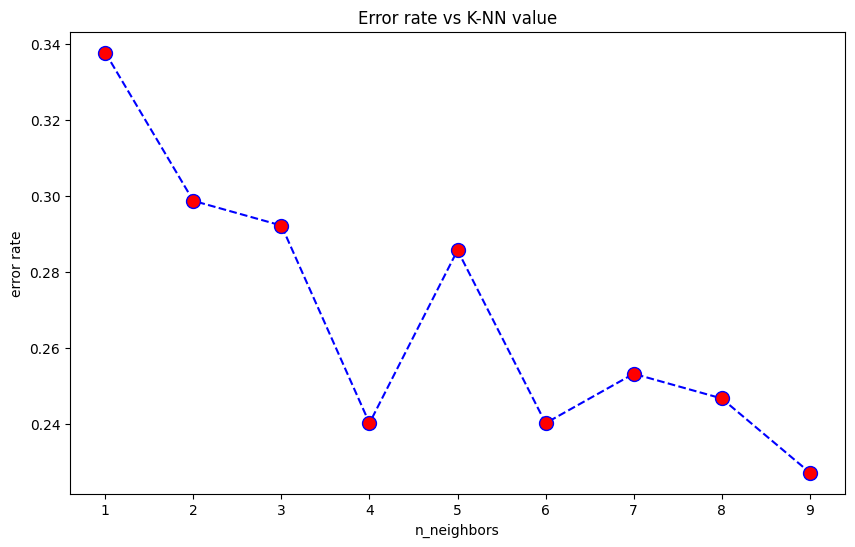

In [423]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
    

El punto más cercano a la zona de abajo será el vecino con el menor índice de error y por tanto el más cercano.

### K-NN para wdbc:

Se repite el mismo proceso de antes:

['B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B']
Precisión: 0.9298245614035088
[[67  2]
 [ 6 39]]
              precision    recall  f1-score   support

           B       0.92      0.97      0.94        69
           M       0.95      0.87      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Error Mínimo:  0.06140350877192982 en n_neighbor:  5


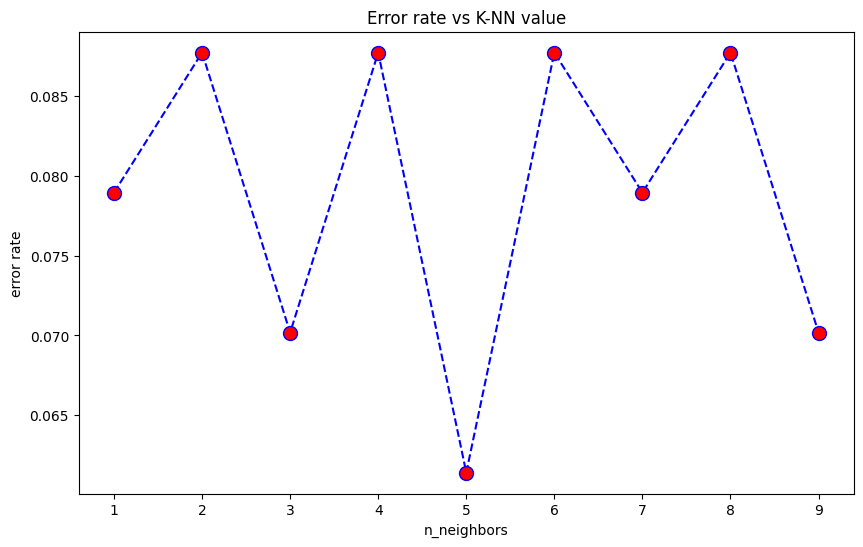

In [424]:
X = dataset2[['Atributo1','Atributo2','Atributo3','Atributo4','Atributo5','Atributo6','Atributo7','Atributo8','Atributo9','Atributo10','Atributo11','Atributo12','Atributo13','Atributo14','Atributo15'
              ,'Atributo16','Atributo17','Atributo18','Atributo19','Atributo20','Atributo21','Atributo22','Atributo23','Atributo24','Atributo25','Atributo26','Atributo27','Atributo28','Atributo29','Atributo30']].values
y = dataset2[['Class']].values.ravel()

# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# | Verdaderos Positivos | Falsos negativos     |
# | Falsos Positivos     | Verdaderos Negativos |

# Ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

print(classification_report(y_test, y_pred))

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)

### K-Means para iris:

Empiezo con las características:

In [425]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [426]:
dataset3.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Miro los valores descriptivos:

In [427]:
dataset3.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Normalizamos los valores y los guardo en una nueva variable:

In [428]:
dataset3_variable = dataset3.drop(['Class'], axis=1)
dataset3_norm = (dataset3_variable-dataset3_variable.min())/(dataset3_variable.max()-dataset3_variable.min())
print(dataset3_norm)

           SL        SW        PL        PW
0    0.222222  0.625000  0.067797  0.041667
1    0.166667  0.416667  0.067797  0.041667
2    0.111111  0.500000  0.050847  0.041667
3    0.083333  0.458333  0.084746  0.041667
4    0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...
145  0.666667  0.416667  0.711864  0.916667
146  0.555556  0.208333  0.677966  0.750000
147  0.611111  0.416667  0.711864  0.791667
148  0.527778  0.583333  0.745763  0.916667
149  0.444444  0.416667  0.694915  0.708333

[150 rows x 4 columns]


Valores descriptivos normalizados:

In [429]:
dataset3_norm.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Búsqueda de la cantidad óptima de clusters:
(Calculamos que tan parecidos son los individuos dentro de los clusters)

In [430]:
wcss = [] #Suma de los cuadrados

for i in range(1,5):
    kmeans = KMeans(n_clusters= i, max_iter = 300)
    kmeans.fit(dataset3_norm)
    wcss.append(kmeans.inertia_)

Gráfico de Codo Jambú, el cual utilizamos para saber cual es el número de clusters óptimo, este es el punto en el que deja de disminuir drásticamente:

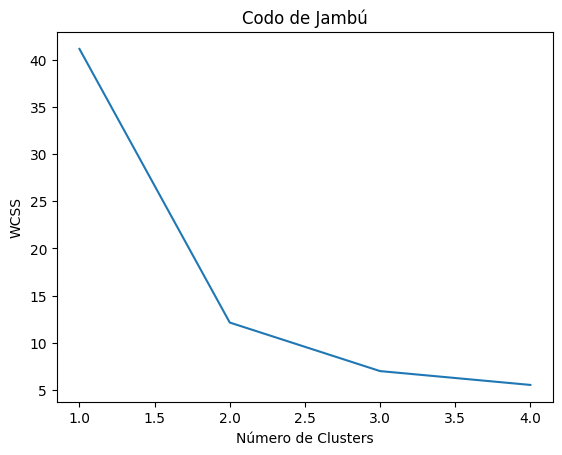

In [431]:
plt.plot(range(1,5),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

### Aplico K-Means a la base de datos

In [432]:
clustering = KMeans(n_clusters=3, max_iter = 300) #Crea el modelo
clustering.fit(dataset3_norm) #Aplica el modelo a la base de datos

KMeans(n_clusters=3)

Agrego la clasificación al archivo original:

In [433]:
dataset3['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
print(dataset3)

      SL   SW   PL   PW           Class  KMeans_Clusters
0    5.1  3.5  1.4  0.2     Iris-setosa                0
1    4.9  3.0  1.4  0.2     Iris-setosa                0
2    4.7  3.2  1.3  0.2     Iris-setosa                0
3    4.6  3.1  1.5  0.2     Iris-setosa                0
4    5.0  3.6  1.4  0.2     Iris-setosa                0
..   ...  ...  ...  ...             ...              ...
145  6.7  3.0  5.2  2.3  Iris-virginica                2
146  6.3  2.5  5.0  1.9  Iris-virginica                1
147  6.5  3.0  5.2  2.0  Iris-virginica                2
148  6.2  3.4  5.4  2.3  Iris-virginica                2
149  5.9  3.0  5.1  1.8  Iris-virginica                1

[150 rows x 6 columns]


### Clusters formados:
(Aplicaremos el análisis de componentes principales)

In [434]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(dataset3_norm)
pca_iris_df = pd.DataFrame(data = pca_iris, columns = ['Componente_1','Componente_2'])
pca_ir = pd.concat([pca_iris_df, dataset3[['KMeans_Clusters']]], axis=1)

print(pca_ir)

     Componente_1  Componente_2  KMeans_Clusters
0       -0.630361      0.111556                0
1       -0.623546     -0.100313                0
2       -0.669793     -0.047220                0
3       -0.654633     -0.098791                0
4       -0.648263      0.137558                0
..            ...           ...              ...
145      0.551755      0.058990                2
146      0.406278     -0.172227                1
147      0.447293      0.036996                2
148      0.489218      0.149121                2
149      0.312079     -0.031151                1

[150 rows x 3 columns]


Creo la gráfica:

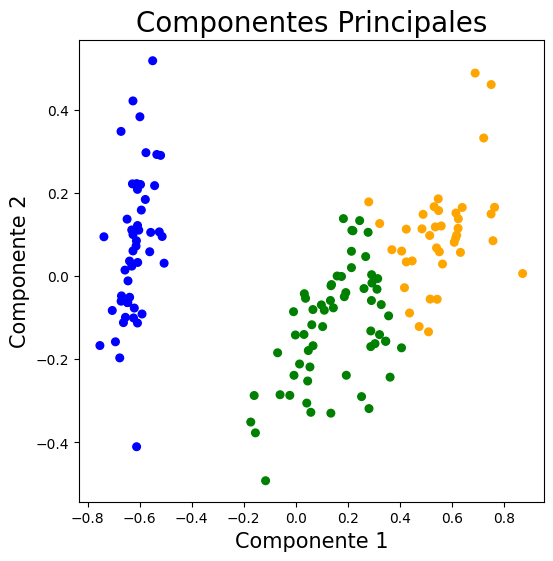

In [435]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_ir.Componente_1, y=pca_ir.Componente_2, c=color_theme[pca_ir.KMeans_Clusters], s=30)

plt.show()